## The Data we needed
#### - Date of Subscription
#### - Date of Cancelled Subscription
#### - Reason for Cancellation
#### - The Subscription Plan of the user

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import random
import datetime

In [2]:
start = datetime.datetime.strptime("01-06-2022", "%d-%m-%Y")
end = datetime.datetime.strptime("01-06-2023", "%d-%m-%Y")
date_generated = [ ( start + datetime.timedelta(days=x) ).strftime("%d-%m-%Y") for x in range(0, (end-start).days)]

In [3]:
year_list_ = [
sorted( [ random.randint(500, 650) for i in np.arange(1,20,1) ] ) +
sorted( [ random.randint(550, 650) for i in np.arange(20,50,1) ], reverse = True ) + 
sorted( [ random.randint(550, 800) for i in np.arange(50,80,1) ] ) + 
sorted( [ random.randint(800, 1200) for i in np.arange(80,100,1) ] ) + 
sorted( [ random.randint(1200, 1800) for i in np.arange(100,120,1) ] ) + 
sorted( [ random.randint(900,1800)  for i in np.arange(120,330,1) ] , reverse = True) +
sorted( [ random.randint(900,1050)  for i in np.arange(330,366,1) ] )
]
# sorted( [ random.randint(400, 900) for i in np.arange(120,240,1) ], reverse = True )
# ]
range_list = date_generated
year_list = list( zip( range_list, year_list_[0] ) )

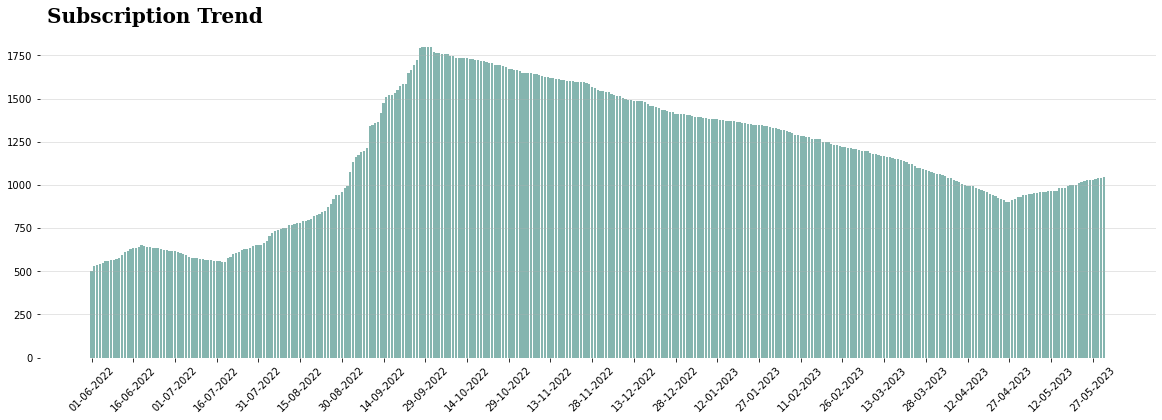

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (20,6))

year_test = pd.DataFrame( year_list ).set_index(0)[1]
ax.bar(year_test.index.astype(str), year_test, width = 0.8, color = "#85B5AF")

for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)

ax.set_xticks( list( year_test.index.astype(str)[::15] ))
ax.set_xticklabels(year_test.index.astype(str)[::15], rotation = 45)

fig.text(0.13, 0.9, "Subscription Trend", fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
plt.show()

In [24]:
bbb = [ ( i, random.randint(80, 150) ) for i in date_generated ] 
ccc =  [ ( i, random.randint(80, 150) ) for i in date_generated ] 
bb = pd.DataFrame( bbb ).set_index(0)[1]
cc = -pd.DataFrame( ccc ).set_index(0)[1]
bb.iloc[100:130] = bb.iloc[100:130].apply( lambda x : random.randint(120, 130) )
bb.iloc[130:180] = sorted( [ random.randint(80, 160) for i in np.arange(0,50,1) ], reverse = True ) 
# bb.iloc[130:132] = [ 300 , 270  ]
bb.iloc[137:140] = [ 250 , 230, 180  ]
bb.iloc[145:148] = [ 350 , 330, 380  ]
bb.iloc[180:365] = bb.iloc[180:365].apply( lambda x : random.randint(85, 150) )
bb.iloc[148:160] = bb.iloc[148:160].apply( lambda x : random.randint(90, 190) )
cc.iloc[150:220] = sorted( [ -random.randint(100, 170) for i in np.arange(0,70,1) ] )
cc.iloc[140:143] = [-270, -250, -230 ]
cc.iloc[160:163] = [-270, -300, -250 ]
cc.iloc[217:220] = [-270, -300, -250 ]
cc.iloc[220:365] = [ -random.randint(60, 150) for i in np.arange(220,365,1) ]
dd = np.cumsum( bb ) + np.cumsum( cc )


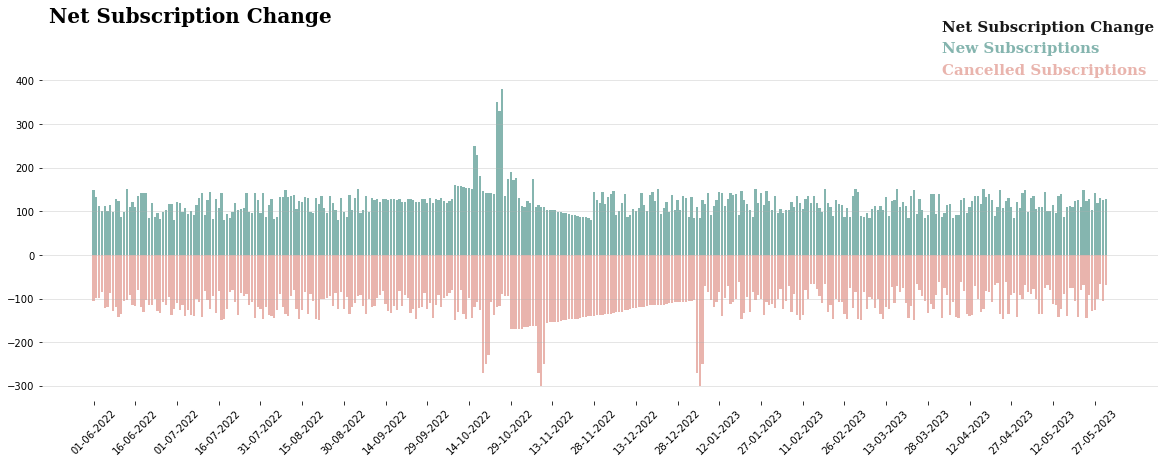

In [25]:
def Net( plot = False ):
      fig, ax = plt.subplots(1, 1, figsize = (20,6))

      ax.bar(bb.index.astype(str), bb, width = 0.8, color = '#85B5AF', label = 'New Subscriptions')
      ax.bar(cc.index.astype(str), cc, width = 0.8, color = '#E9B4AD', label = 'Cancelled Subscriptions')
      if plot:
            ax.plot(dd.index.astype(str), dd, linewidth = 1.3, color = '#191919', label = 'Net')

      for s in ['top','left','right','bottom']:
            ax.spines[s].set_visible(False)

      ax.set_xticks(cc.index.astype(str)[::15])
      ax.set_xticklabels(cc.index.astype(str)[::15], rotation = 45)

      ax.grid(axis = 'y', linestyle = '-', alpha = 0.4) # background grid

      fig.text(0.13, 1, "Net Subscription Change", fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
      fig.text(0.75,0.98,"Net Subscription Change", color = '#191919', fontweight = "bold",fontfamily = 'serif', fontsize = 15)
      fig.text(0.75,0.93,"New Subscriptions", color = '#85B5AF', fontweight = "bold",fontfamily = 'serif', fontsize = 15)
      fig.text(0.75,0.88,"Cancelled Subscriptions",color = '#E9B4AD', fontweight = "bold",fontfamily = 'serif', fontsize = 15)

      plt.show()
Net()

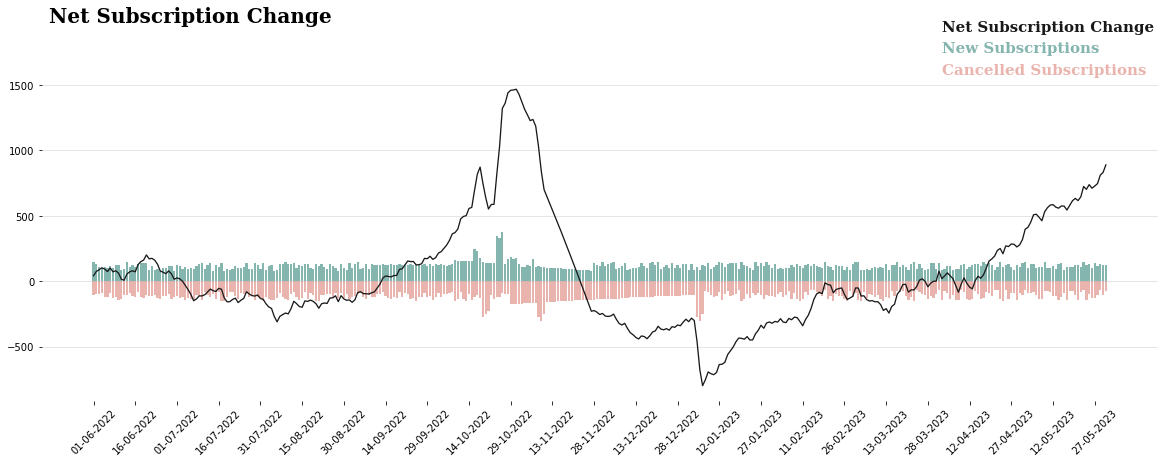

In [26]:
Net( plot=True )

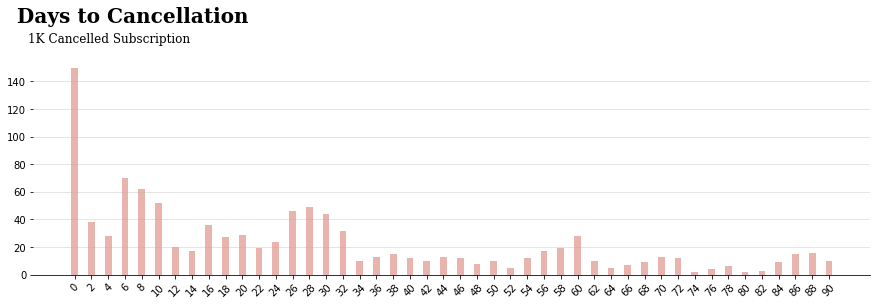

In [27]:
cancel_list = '''150,38,28,70,62,52,20,17,36,27,29,19,24,46,49,44,32,10,13,15,12,10,13,12,8,10,5,12,17,19,28,10,5,7,9,13,12,2,4,6,2,3,9,15,16,10'''
cancel = list( zip( np.arange(0,91,2), [ int(_) for _ in cancel_list.split(',') ] ) )
cancel_df = pd.DataFrame( cancel ).set_index(0)[1]

fig, ax = plt.subplots(1, 1, figsize = (15,4))

ax.bar(cancel_df.index, cancel_df, width = 0.8, color = "#E9B4AD")

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_xticks( cancel_df.index )
ax.set_xticklabels( cancel_df.index, rotation = 45)

fig.text(0.11, 1, "Days to Cancellation", fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
fig.text(0.12, 0.93, "1K Cancelled Subscription", fontsize = 12, fontweight = 'light', fontfamily = 'serif')
plt.show()

In [31]:
reason = {
    "Other" : 80,
    "I didn't know I was in a membership" : 20,
    "I'm using another platform" : 10,
    "I'm having technical problems" : 10,
    "It's too expensive" : 30,
}
reason_df = pd.DataFrame( reason.items() ).set_index(0)[1]

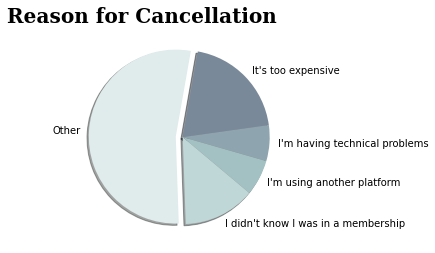

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (15,4))

explode = [0 for _ in range(5)]
explode[0] = 0.08

ax.pie(x = reason_df , labels = reason_df.index, shadow = True, startangle = 80, explode = explode,
        colors = sns.color_palette("bone", n_colors = 10)[9:2:-1] )
fig.text(0.35, 0.9, "Reason for Cancellation", fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
plt.show()

In [ ]:
cohort_data = {
    'Startmonth' : [ f'{_} 2022' for _ in ['Jun','Jul','Aug','Sep','Oct','Nov','Dec'] ] + [ f'{_} 2023' for _ in ['Jan','Feb','Mar','Apr','May'] ],
    '# Subscription' : [358,265,381,699,782,541,435,375,309,311,430,12],
    '# Currently active' : [36,21,53,139,100,72,64,79,71,80,225,11],
    '15 Days' : [ f'{_}%' for _ in [ random.randint(60, 70) for i in np.arange(0,11,1) ] + [0] ],
    '30 Days' : [ f'{_}%' for _ in [ random.randint(40, 55) for i in np.arange(0,10,1) ] + [0,0] ],
    '60 Days' : [ f'{_}%' for _ in [ random.randint(28, 40) for i in np.arange(0,9,1) ] + [0,0,0] ],
    '90 Days' : [ f'{_}%' for _ in [ random.randint(19, 25) for i in np.arange(0,8,1) ] + [0,0,0,0] ],
    '120 Days' : [ f'{_}%' for _ in [ random.randint(12, 22) for i in np.arange(0,7,1) ] + [0,0,0,0,0] ],
    '150 Days' : [ f'{_}%' for _ in [ random.randint(12, 22) for i in np.arange(0,6,1) ] + [0,0,0,0,0,0] ],
    '180 Days' : [ f'{_}%' for _ in [ random.randint(12, 22) for i in np.arange(0,5,1) ] + [0,0,0,0,0,0,0] ],
}
cohort_df = pd.DataFrame( cohort_data )
print( cohort_df )

,Startmonth,# Subscription,# Currently active,15 Days,30 Days,60 Days,90 Days,120 Days,150 Days,180 Days
0,Jun 2022,358,36,68%,49%,32%,25%,12%,18%,22%
1,Jul 2022,265,21,65%,40%,35%,21%,20%,16%,16%
2,Aug 2022,381,53,65%,40%,33%,19%,16%,15%,17%
3,Sep 2022,699,139,67%,49%,40%,21%,19%,14%,19%
4,Oct 2022,782,100,70%,53%,32%,24%,19%,21%,12%
5,Nov 2022,541,72,63%,55%,39%,19%,13%,21%,0%
6,Dec 2022,435,64,61%,45%,35%,25%,21%,0%,0%
7,Jan 2023,375,79,63%,55%,28%,19%,0%,0%,0%
8,Feb 2023,309,71,70%,41%,40%,0%,0%,0%,0%
9,Mar 2023,311,80,70%,43%,0%,0%,0%,0%,0%
